In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [25]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8b36b72a41a133855cf57d2685b6b2bb


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
coordinates = lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [4]:
cities

['qaanaaq',
 'bluff',
 'cape town',
 'samusu',
 'maniitsoq',
 'vestmannaeyjar',
 'victoria',
 'provideniya',
 'albany',
 'rikitea',
 'takoradi',
 'flinders',
 'san cristobal',
 'portland',
 'rio gallegos',
 'laiagam',
 'kamaishi',
 'oktyabrskiy',
 'mataura',
 'isangel',
 'punta arenas',
 'alofi',
 'cabo san lucas',
 'mahebourg',
 'nikolskoye',
 'tirumullaivasal',
 'hobart',
 'barrow',
 'monrovia',
 'atuona',
 'busselton',
 'vaini',
 'anadyr',
 'khatanga',
 'pochutla',
 'batagay-alyta',
 'luanda',
 'port alfred',
 'lebu',
 'chuy',
 'ushuaia',
 'hasaki',
 'marsh harbour',
 'butaritari',
 'tessalit',
 'hermanus',
 'cockburn town',
 'college',
 'carnarvon',
 'tonantins',
 'grand centre',
 'codrington',
 'ginir',
 'corrales',
 'kapaa',
 'salamanca',
 'yellowknife',
 'airai',
 'la ronge',
 'avarua',
 'amderma',
 'warrnambool',
 'sorong',
 'muros',
 'pontes e lacerda',
 'grand river south east',
 'saint george',
 'catumbela',
 'bubaque',
 'vila',
 'kaitangata',
 'almaznyy',
 'tsihombe',
 'tao

In [10]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime



In [11]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")


# create counters
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   


Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | samusu
City not found. Skipping...
Processing Record 5 of Set 1 | maniitsoq
Processing Record 6 of Set 1 | vestmannaeyjar
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | takoradi
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | portland
Processing Record 15 of Set 1 | rio gallegos
Processing Record 16 of Set 1 | laiagam
City not found. Skipping...
Processing Record 17 of Set 1 | kamaishi
Processing Record 18 of Set 1 | oktyabrskiy
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | alofi
Processing Record 23 of Set 1 | cabo sa

Processing Record 38 of Set 4 | khonuu
City not found. Skipping...
Processing Record 39 of Set 4 | tuktoyaktuk
Processing Record 40 of Set 4 | buckeye
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | businga
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | inhambane
Processing Record 45 of Set 4 | puerto ayacucho
Processing Record 46 of Set 4 | aasiaat
Processing Record 47 of Set 4 | brae
Processing Record 48 of Set 4 | gangotri
City not found. Skipping...
Processing Record 49 of Set 4 | horqueta
Processing Record 50 of Set 4 | caronport
Processing Record 1 of Set 5 | pyshchug
Processing Record 2 of Set 5 | azar shahr
City not found. Skipping...
Processing Record 3 of Set 5 | kavaratti
Processing Record 4 of Set 5 | la seyne-sur-mer
Processing Record 5 of Set 5 | srednekolymsk
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | eyl
Processing Record 8 of Se

Processing Record 24 of Set 8 | linxia
Processing Record 25 of Set 8 | general cepeda
Processing Record 26 of Set 8 | ixtapa
Processing Record 27 of Set 8 | dehui
Processing Record 28 of Set 8 | venado tuerto
Processing Record 29 of Set 8 | snezhnogorsk
Processing Record 30 of Set 8 | tanete
Processing Record 31 of Set 8 | abeche
Processing Record 32 of Set 8 | jaque
Processing Record 33 of Set 8 | bogashevo
Processing Record 34 of Set 8 | springdale
Processing Record 35 of Set 8 | lazaro cardenas
Processing Record 36 of Set 8 | pinega
Processing Record 37 of Set 8 | marang
Processing Record 38 of Set 8 | muhos
Processing Record 39 of Set 8 | lazarev
Processing Record 40 of Set 8 | alotau
City not found. Skipping...
Processing Record 41 of Set 8 | agirish
Processing Record 42 of Set 8 | opunake
Processing Record 43 of Set 8 | sinnamary
Processing Record 44 of Set 8 | innisfail
Processing Record 45 of Set 8 | peoria
Processing Record 46 of Set 8 | ciudad bolivar
Processing Record 47 of 

Processing Record 11 of Set 12 | sao felix do xingu
Processing Record 12 of Set 12 | north bend
Processing Record 13 of Set 12 | cervo
Processing Record 14 of Set 12 | el angel
Processing Record 15 of Set 12 | ixtacuixtla
City not found. Skipping...
Processing Record 16 of Set 12 | juneau
Processing Record 17 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 18 of Set 12 | ahvaz
Processing Record 19 of Set 12 | kupang
Processing Record 20 of Set 12 | ancud
Processing Record 21 of Set 12 | guelengdeng
City not found. Skipping...
Processing Record 22 of Set 12 | khorol
Processing Record 23 of Set 12 | walvis bay
Processing Record 24 of Set 12 | mukhen
Processing Record 25 of Set 12 | mackay
Processing Record 26 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 27 of Set 12 | kalagarh
Processing Record 28 of Set 12 | moerai
Processing Record 29 of Set 12 | uroteppa
City not found. Skipping...
Processing Record 30 of Set 12 | amur
Processing Record 31 

In [17]:
city_data_df = pd.DataFrame(city_data)

In [18]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,19.58,73,99,1.83,GL,2022-05-07 18:08:51
1,Bluff,-46.6000,168.3333,57.79,81,89,7.18,NZ,2022-05-07 18:08:51
2,Cape Town,-33.9258,18.4232,59.27,73,0,10.00,ZA,2022-05-07 18:08:48
3,Maniitsoq,65.4167,-52.9000,32.59,72,22,10.54,GL,2022-05-07 18:08:52
4,Vestmannaeyjar,63.4427,-20.2734,45.21,78,90,22.08,IS,2022-05-07 18:08:52
5,Victoria,22.2855,114.1577,77.38,78,99,5.01,HK,2022-05-07 18:07:09
6,Provideniya,64.3833,-173.3000,31.12,92,100,7.20,RU,2022-05-07 18:08:53
7,Albany,42.6001,-73.9662,58.59,36,100,1.99,US,2022-05-07 18:08:53
8,Rikitea,-23.1203,-134.9692,77.47,83,67,11.03,PF,2022-05-07 18:08:54
9,Takoradi,4.8845,-1.7554,81.75,78,99,6.53,GH,2022-05-07 18:08:54


In [19]:
new_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-05-07 18:08:51,77.4840,-69.3632,19.58,73,99,1.83
1,Bluff,NZ,2022-05-07 18:08:51,-46.6000,168.3333,57.79,81,89,7.18
2,Cape Town,ZA,2022-05-07 18:08:48,-33.9258,18.4232,59.27,73,0,10.00
3,Maniitsoq,GL,2022-05-07 18:08:52,65.4167,-52.9000,32.59,72,22,10.54
4,Vestmannaeyjar,IS,2022-05-07 18:08:52,63.4427,-20.2734,45.21,78,90,22.08
5,Victoria,HK,2022-05-07 18:07:09,22.2855,114.1577,77.38,78,99,5.01
6,Provideniya,RU,2022-05-07 18:08:53,64.3833,-173.3000,31.12,92,100,7.20
7,Albany,US,2022-05-07 18:08:53,42.6001,-73.9662,58.59,36,100,1.99
8,Rikitea,PF,2022-05-07 18:08:54,-23.1203,-134.9692,77.47,83,67,11.03
9,Takoradi,GH,2022-05-07 18:08:54,4.8845,-1.7554,81.75,78,99,6.53


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extracting data for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

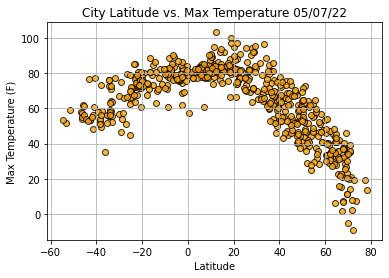

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities",
            color = "Orange")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

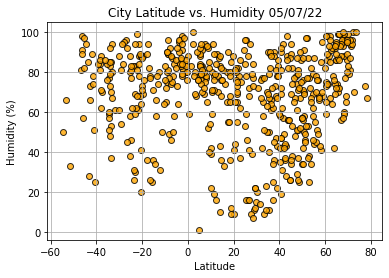

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities",
            color = "Orange")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

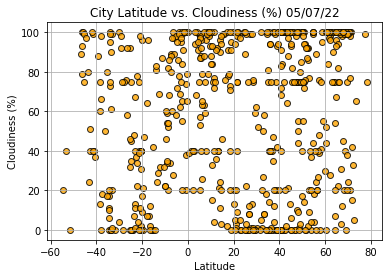

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities",
            color = "Orange")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

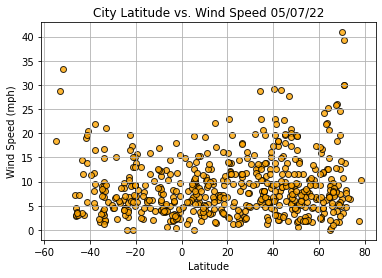

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities",
            color = "Orange")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()